## ADEDAYO ADEGOKE PORTFOLIO

**Data Exploration Tasks - Statistics of individual variables:**

**3. For each of the three individual numerical variables below,** summarise and comment
upon the data by calculating relevant summary statistics and by creating two possible
visualisations of their distributions for each variable.
   
   **a) time**
    
   **b) TEU**
    
   **c) wind**

**4. For each of the individual categorical variables below,** summarise and comment upon
the data by calculating the frequency and relative proportion of each possible value,
and by creating two suitable visualisations of their distributions.
    
   **a) origin**
    
   **b) labour**

To summarise and comment upon the data for the three numerical variables (time, TEU, and wind), I calculate relevant summary statistics and create visualisations.

a) Time:

Time is a continuous numerical variable that likely represents a period or timestamp. Summary statistics and visualisations for time data can provide insights into patterns and trends over time.

Summary Statistics:

Mean (average time)
Median (middle time)
Standard Deviation (spread of time values)
Minimum and Maximum (start and end times)
Quartiles (25th, 50th, 75th percentiles)
Visualisations:

Time Series Plot: I create a line chart showing how the variable changes over time. This can reveal trends, seasonality, and outliers.

Histogram or Density Plot: Create a histogram or density plot to show the distribution of time values. This can help identify any patterns in the time data.

### Data cleansing and wrangling

Various methods have been used historically for missing values imputation. Dadi, K et al. (2021) used mean for imputation as it maintains the column's overall distribution and it is widely used. Therefore missing values for Gear and Wind shall be replaced their mean.

In [1]:
# Loading necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statistics as stat

# Load the data
ports_replacemissing = pd.read_csv("ports.csv")

# Display the first few rows of the DataFrame to understand its structure
print(ports_replacemissing.shape)
ports_replacemissing.head()

(1006, 13)


,time,TEU,loadratio,gear,wind,rain,weather,onSchedule,labour,origin,delay,date,port
0,263.2,8645,85.4,0.0,3.9,8.4,disruptive,Yes,working,Intercontinental,No,2022-11-01,Abermouth
1,177.9,2106,80.8,1.0,7.5,7.7mm,disruptive,Yes,1,Intercontinental,Yes,2021-09-09,Abermouth
2,269.3,7872,90.4,3.0,6.9,19.3mm,disruptive,Yes,1,Intercontinental,No,2021-08-05,Abermouth
3,122.2,1938,72.2,1.0,8.9,3.8,normal,Yes,working,UK,No,2022-11-03,Abermouth
4,165.0,1669,80.0,4.0,2.0,0.1,normal,No,striking,UK,Yes,2022-02-01,Abermouth


Dataset after replacing missing values with their mean:

In [2]:
# replace missing values with mean for each numeric column
for col in ports_replacemissing.select_dtypes(include=['float64', 'int64']):
    ports_replacemissing[col].fillna(ports_replacemissing[col].mean(), inplace=True)

# Print the dataset after replacing missing values
print("\nDataset after replacing missing values with their mean:")
ports_replacemissing.head()


Dataset after replacing missing values with their mean:


,time,TEU,loadratio,gear,wind,rain,weather,onSchedule,labour,origin,delay,date,port
0,263.2,8645,85.4,0.0,3.9,8.4,disruptive,Yes,working,Intercontinental,No,2022-11-01,Abermouth
1,177.9,2106,80.8,1.0,7.5,7.7mm,disruptive,Yes,1,Intercontinental,Yes,2021-09-09,Abermouth
2,269.3,7872,90.4,3.0,6.9,19.3mm,disruptive,Yes,1,Intercontinental,No,2021-08-05,Abermouth
3,122.2,1938,72.2,1.0,8.9,3.8,normal,Yes,working,UK,No,2022-11-03,Abermouth
4,165.0,1669,80.0,4.0,2.0,0.1,normal,No,striking,UK,Yes,2022-02-01,Abermouth


In [3]:
# Check for missing values in each column
missing_values = ports_replacemissing.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Remove rows with missing data
ports_replacemissing = ports_replacemissing.dropna()

# Print the shape of the DataFrame after removing rows with missing data
print("Shape of the dataset after removing rows with missing data:")
print(ports_replacemissing.shape)

Missing values in each column:
time          0
TEU           0
loadratio     0
gear          0
wind          0
rain          0
weather       0
onSchedule    0
labour        0
origin        0
delay         0
date          0
port          0
dtype: int64
Shape of the dataset after removing rows with missing data:
(1006, 13)


### To identify and remove any duplicate rows from the DataFrame, I will:

Use the duplicated() method to identify any duplicate rows, marking them as True if they are duplicates.
Use the drop_duplicates() method to remove the duplicate rows.
I will then display the number of duplicate rows identified and removed.

In [4]:
# Identifying duplicate rows
duplicate_rows = ports_replacemissing.duplicated()
num_duplicates = duplicate_rows.sum()

# Displaying the number of duplicate rows
print(num_duplicates)

6


The dataset contains 6 duplicate rows. I will now remove these duplicates and confirm their removal.

Damodaram (2022) and Steorts (2023) emphasise the importance of removing duplicates in data management and analysis, highlighting its role in maintaining data integrity and quality.

The below code identifies and displays the number of duplicate rows in the 'ports' DataFrame.

In [5]:
# Removing duplicate rows
ports_replacemissing = ports_replacemissing.drop_duplicates()

# Verifying if duplicates are removed
remaining_duplicates = ports_replacemissing.duplicated().sum()

# Display the result
remaining_duplicates, ports_replacemissing.shape
print(remaining_duplicates, ports_replacemissing.shape)

0 (1000, 13)


I have successfully removed six duplicates rows from our dataset. As a result, the dataset now comprises 1000 rows and 13 columns.

## Convert the rain column from text to numerical format.

I will strip the "mm" from the values and convert the column to a float type.

In [6]:
# # Strip "mm" from the 'rain' column and convert to float
# ports_replacemissing['rain'] = ports_replacemissing['rain'].str.replace('mm', '').astype(float)

# # Display the modified data
# ports_replacemissing.head()

# Check if 'rain' column exists in the DataFrame, then strip "mm" and convert to float
if 'rain' in ports_replacemissing.columns:
    ports_replacemissing['rain'] = ports_replacemissing['rain'].str.replace('mm', '').astype(float)
else:
    print("The 'rain' column does not exist in the DataFrame.")

# Display the modified data
ports_replacemissing.head()

,time,TEU,loadratio,gear,wind,rain,weather,onSchedule,labour,origin,delay,date,port
0,263.2,8645,85.4,0.0,3.9,8.4,disruptive,Yes,working,Intercontinental,No,2022-11-01,Abermouth
1,177.9,2106,80.8,1.0,7.5,7.7,disruptive,Yes,1,Intercontinental,Yes,2021-09-09,Abermouth
2,269.3,7872,90.4,3.0,6.9,19.3,disruptive,Yes,1,Intercontinental,No,2021-08-05,Abermouth
3,122.2,1938,72.2,1.0,8.9,3.8,normal,Yes,working,UK,No,2022-11-03,Abermouth
4,165.0,1669,80.0,4.0,2.0,0.1,normal,No,striking,UK,Yes,2022-02-01,Abermouth


The 'rain' column's "mm" values have been stripped, converting the data to a numerical type. It is crucial to format data appropriately for precise and efficient processing in data analysis. Take the 'rain' column as an example: changing values from a string format like "3.1mm" to a numerical one such as 3.1 is essential for quantitative analysis.

Using numerical data allows for various statistical calculations, such as computing averages, examining correlations, and performing regression analyses, which are complex with string data.

## Standardise the labour column to have consistent formatting.

I intend to unify the 'labour' column by substituting '0' with 'striking' and '1' with 'working', ensuring consistency throughout the column.

In [7]:
# Replace '0' with 'striking' and '1' with 'working' in the 'labour' column
ports_replacemissing['labour'] = ports_replacemissing['labour'].replace({'0': 'striking', '1': 'working'})

# Display the modified data
ports_replacemissing.head()

,time,TEU,loadratio,gear,wind,rain,weather,onSchedule,labour,origin,delay,date,port
0,263.2,8645,85.4,0.0,3.9,8.4,disruptive,Yes,working,Intercontinental,No,2022-11-01,Abermouth
1,177.9,2106,80.8,1.0,7.5,7.7,disruptive,Yes,working,Intercontinental,Yes,2021-09-09,Abermouth
2,269.3,7872,90.4,3.0,6.9,19.3,disruptive,Yes,working,Intercontinental,No,2021-08-05,Abermouth
3,122.2,1938,72.2,1.0,8.9,3.8,normal,Yes,working,UK,No,2022-11-03,Abermouth
4,165.0,1669,80.0,4.0,2.0,0.1,normal,No,striking,UK,Yes,2022-02-01,Abermouth


I have made the 'labour' column consistent by replacing '0' with 'striking' and '1' with 'working'. This standardisation of categorical data, demonstrated by the transformation of '0' and '1' to 'striking' and 'working', enhances clarity and uniformity in the dataset. It not only aids in category-based analysis but also improves the readability of the data.

This process of data cleaning and standardisation is crucial, as emphasised by Steorts (2023) in "A Primer on the Data Cleaning Pipeline" and Zacks, Kenett, and Gedeck (2023) in "Modern Statistics: A Computer-Based Approach with Python Solutions." These authors underline the importance of thorough data preparation for achieving accurate and insightful analysis, highlighting the fundamental role of data preprocessing in statistics.

# Data Exploration Tasks - Statistics of individual variables:

To summarise and comment upon the data for the three numerical variables (time, TEU, and wind), I calculate relevant summary statistics and create visualisations.

### a) Time:

Time is a continuous numerical variable that likely represents a period or timestamp. Summary statistics and visualisations for time data can provide insights into patterns and trends over time.

### Summary Statistics:

Mean (average time)
Median (middle time)
Standard Deviation (spread of time values)
Minimum and Maximum (start and end times)
Quartiles (25th, 50th, 75th percentiles)

### Visualisations:

Time Series Plot: I create a line chart showing how the variable changes over time. This can reveal trends, seasonality, and outliers.

Histogram or Density Plot: Create a histogram or density plot to show the distribution of time values. This can help identify any patterns in the time data.

Using pandas module functions
n = 1000
Measures of central location
mean = 242.1025
median = 231.4
Measures of spread
range = 532.6
quartiles = 0.25    177.900
0.50    231.400
0.75    295.625
Name: time, dtype: float64
IQR = 117.725
stdev = 85.29927508531406
pop stdev = 85.25661478002749
Measures of shape
skewness = 0.5672599044505674
excess kurtosis = 0.09328304757823647


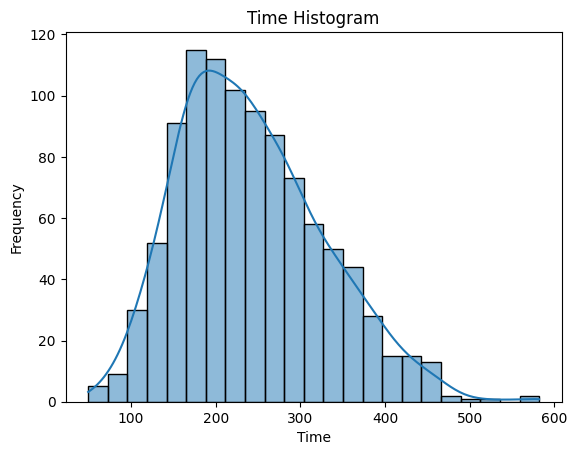

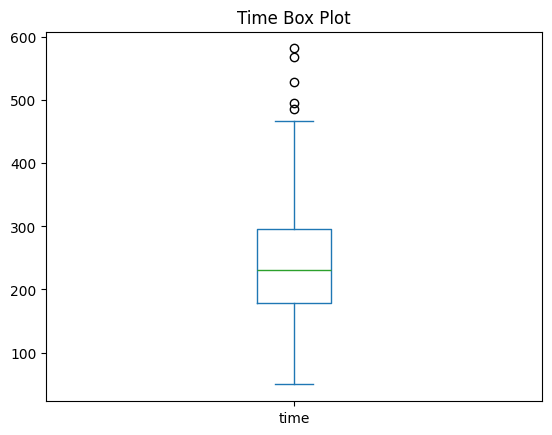

In [8]:

# Display basic statistics
print("Using pandas module functions")
print("n =", ports_replacemissing['time'].count())

# Measures of central location
print("Measures of central location")
print("mean =", ports_replacemissing['time'].mean())
print("median =", ports_replacemissing['time'].median())

# Measures of spread
print("Measures of spread")
print("range =", ports_replacemissing['time'].max() - ports_replacemissing['time'].min())
q = ports_replacemissing['time'].quantile([0.25, 0.5, 0.75])
print("quartiles =", q)
print("IQR =", ports_replacemissing['time'].quantile(0.75) - ports_replacemissing['time'].quantile(0.25))
print("stdev =", ports_replacemissing['time'].std())
print("pop stdev =", ports_replacemissing['time'].std(ddof=0))

# Measures of shape
print("Measures of shape")
print("skewness =", ports_replacemissing['time'].skew())
print("excess kurtosis =", ports_replacemissing['time'].kurt())

# Create a histogram
sns.histplot(ports_replacemissing['time'], kde=True)
plt.title("Time Histogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

# Create a box plot
ports_replacemissing['time'].plot.box()
plt.title("Time Box Plot")
plt.show()

The histogram and boxplot display the distribution of 'time' with 1000 observations (n = 1000). The histogram reveals a distribution with a positive skew (skewness = 0.567), indicating a tail with higher time values. The mean 'time' is 242.1, slightly above the median of 231.4, consistent with a positive skewness. The IQR of 117.725 suggests a moderate spread of the middle 50% of data around the median. The excess kurtosis close to zero (0.093) implies a distribution with tails similar to a normal distribution, which is neither mainly flat nor peaked. Outliers are visible in the boxplot, indicating significantly higher time spent than typical, which could signify operational anomalies or data recording errors.

### b) TEU (Twenty-foot Equivalent Unit):
    
TEU is a numerical variable representing cargo container capacity.

### Summary Statistics:

Mean (average TEU) Median (middle TEU) Standard Deviation (spread of TEU values) Minimum and Maximum (minimum and maximum TEU) Quartiles (25th, 50th, 75th percentiles) Visualizations:

Histogram: Create a histogram to visualize the distribution of TEU values. Helps identify common capacity values.

### Box Plot: A box plot can show the median, quartiles, and any outliers in the TEU data, giving insights into the spread of capacity values.

Using pandas module functions
n = 1000
Measures of central location
mean = 6176.263
median = 6274.0
Measures of spread
range = 11794
quartiles = 0.25    2940.75
0.50    6274.00
0.75    9420.25
Name: TEU, dtype: float64
IQR = 6479.5
stdev = 3613.3406061658766
pop stdev = 3611.5334839692428
Measures of shape
skewness = -0.043795419233411265
excess kurtosis = -1.2698941355029683


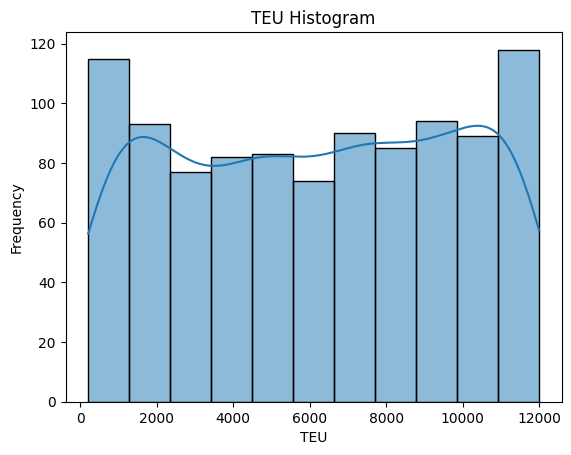

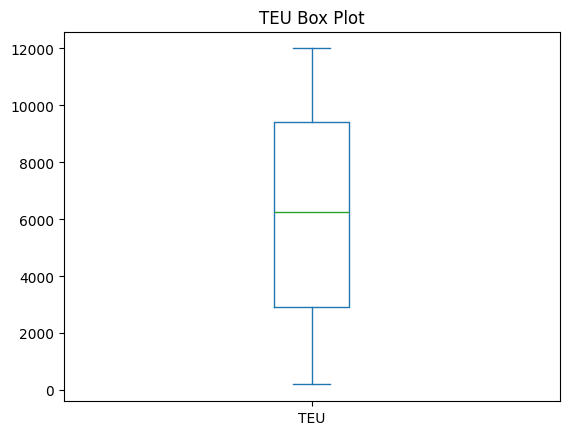

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Display basic statistics
print("Using pandas module functions")
print("n =", ports_replacemissing['TEU'].count())

# Measures of central location
print("Measures of central location")
print("mean =", ports_replacemissing['TEU'].mean())
print("median =", ports_replacemissing['TEU'].median())

# Measures of spread
print("Measures of spread")
print("range =", ports_replacemissing['TEU'].max() - ports_replacemissing['TEU'].min())
q = ports_replacemissing['TEU'].quantile([0.25, 0.5, 0.75])
print("quartiles =", q)
print("IQR =", ports_replacemissing['TEU'].quantile(0.75) - ports_replacemissing['TEU'].quantile(0.25))
print("stdev =", ports_replacemissing['TEU'].std())
print("pop stdev =", ports_replacemissing['TEU'].std(ddof=0))

# Measures of shape
print("Measures of shape")
print("skewness =", ports_replacemissing['TEU'].skew())
print("excess kurtosis =", ports_replacemissing['TEU'].kurt())

# Create a histogram
sns.histplot(ports_replacemissing['TEU'], kde=True)
plt.title("TEU Histogram")
plt.xlabel("TEU")
plt.ylabel("Frequency")
plt.show()

# Create a box plot
ports_replacemissing['TEU'].plot.box()
plt.title("TEU Box Plot")
plt.show()

The histogram and boxplot for TEU (Twenty-foot Equivalent Unit) reflect a dataset of 1000 observations with a uniform distribution, evidenced by the minor negative skewness (-0.0438) and an excess kurtosis of -1.27, suggesting a slightly flatter peak than a normal distribution. The median (6274) is marginally higher than the mean (6176.263), consistent with the slight left skew. The IQR is sizeable at 6479.5, indicating a considerable spread of the middle 50% of the data. Notably, the histogram shows a less common TEU range between 8000 to 10000, with a resurgence beyond 10000. This could suggest a bimodal distribution, where two different groups of ships—perhaps by size or cargo type—are represented in the dataset.

### (c) Wind

Wind is a numerical variable that measures wind speed.

### Summary Statistics:

Mean (average wind speed) Median (middle wind speed) Standard Deviation (spread of wind speed values) Minimum and Maximum (minimum and maximum wind speed) Quartiles (25th, 50th, 75th percentiles) Visualizations:

Histogram: Create a histogram to visualize the distribution of wind speed values. This can help identify common wind speed ranges.

Box Plot: A box plot can show the median, quartiles, and any outliers in the wind speed data, giving insights into the spread of wind speed values.

### Comments:

For time data, I observe time patterns/trends.
TEU data helps understand the capacity of cargo containers.
Wind data provide insights into the wind speed conditions at the ports.

Using pandas module functions
n = 1000
Measures of central location
mean = 5.6769469035533
median = 4.9
Measures of spread
range = 25.4
quartiles = 0.25    2.6
0.50    4.9
0.75    8.0
Name: wind, dtype: float64
IQR = 5.4
stdev = 4.0863108785430775
pop stdev = 4.084267212059392
Measures of shape
skewness = 1.101215618226933
excess kurtosis = 1.4764969171637046


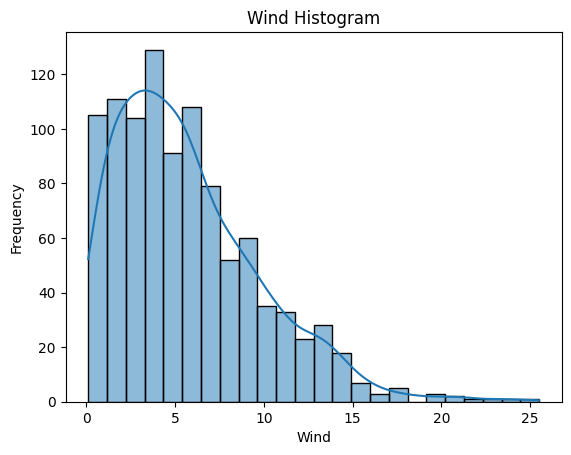

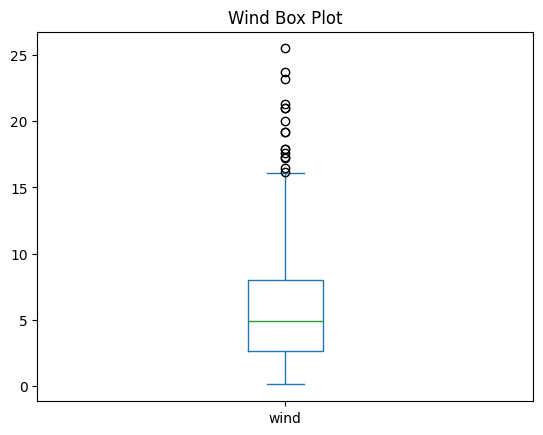

In [12]:
import matplotlib.pyplot as plt   
import pandas as pd
import matplotlib.pyplot as plt


# Display basic statistics
print("Using pandas module functions")
print("n =", ports_replacemissing['wind'].count())

# Measures of central location
print("Measures of central location")
print("mean =", ports_replacemissing['wind'].mean())
print("median =", ports_replacemissing['wind'].median())

# Measures of spread
print("Measures of spread")
print("range =", ports_replacemissing['wind'].max() - ports_replacemissing['wind'].min())
q = ports_replacemissing['wind'].quantile([0.25, 0.5, 0.75])
print("quartiles =", q)
print("IQR =", ports_replacemissing['wind'].quantile(0.75) - ports_replacemissing['wind'].quantile(0.25))
print("stdev =", ports_replacemissing['wind'].std())
print("pop stdev =", ports_replacemissing['wind'].std(ddof=0))

# Measures of shape
print("Measures of shape")
print("skewness =", ports_replacemissing['wind'].skew())
print("excess kurtosis =", ports_replacemissing['wind'].kurt())

# Create a histogram
sns.histplot(ports_replacemissing['wind'], kde=True)
plt.title("Wind Histogram")
plt.xlabel("Wind")
plt.ylabel("Frequency")
plt.show()

# Create a box plot
ports_replacemissing['wind'].plot.box()
plt.title("Wind Box Plot")
plt.show()

With its positively skewed (skewness = 1.10) distribution, the wind data suggests that higher wind speeds are less frequent. The histogram tails off to the right, confirming this skewness. The mean wind speed (5.68) is slightly above the median (4.9), which is typical for right-skewed data. The boxplot reveals several outliers, indicating sporadic high wind-speed occurrences—an IQR of 5.4 points to moderate variability in wind speeds. The excess kurtosis (1.48) indicates a leptokurtic distribution; wind speeds are more peaked and have fatter tails than a normal distribution, suggesting a greater probability of extreme values. This data could be crucial for assessing the impact of wind conditions on port operations.

### 4 (a) Origin

For each of the individual categorical variables below, summarise and comment upon the data by calculating the frequency and relative proportion of each possible value, and by creating two suitable visualisations of their distributions.

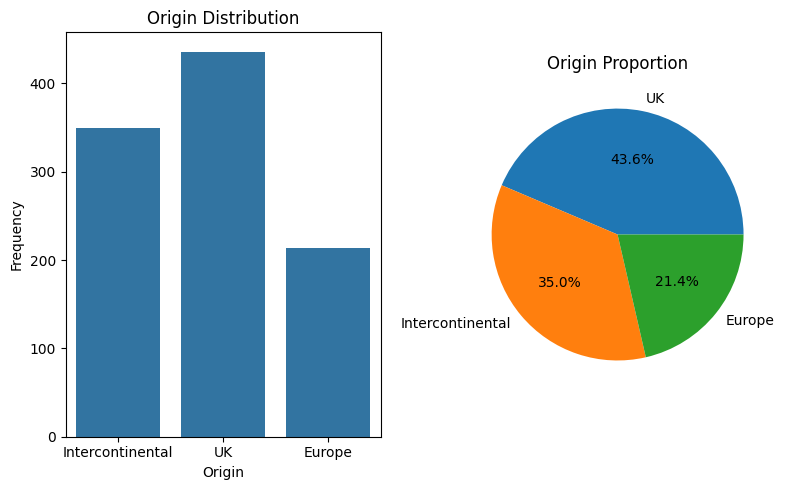

In [13]:
# Calculate frequency and relative proportion for each categorical variable
# Replace 'variable_name' with the actual column name in your dataset

# Origin variable
origin_frequency = ports_replacemissing['origin'].value_counts()
origin_proportion = ports_replacemissing['origin'].value_counts(normalize=True)

# Visualisations

# Origin variable visualisations
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=ports_replacemissing, x='origin')
plt.title("Origin Distribution")
plt.xlabel("Origin")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
origin_proportion.plot(kind='pie', autopct='%1.1f%%')
plt.title("Origin Proportion")
plt.ylabel(None)

plt.tight_layout()
plt.show()

The visualisations depict the distribution of ship origins in the dataset. The bar chart shows the frequency of ships from each origin, with 'UK' having the highest count, followed by 'Intercontinental', and 'Europe' being the least frequent. The pie chart complements this by displaying the relative proportion, where 'UK' again takes the most significant segment at 43.6%, 'Intercontinental' at 35%, and 'Europe' at 21.4%.

These charts together provide a clear and immediate understanding of the composition of ship origins in the dataset. The predominance of UK ships could indicate a dataset centric on UK ports or routes. The lower proportion of European ships might suggest fewer routes or smaller trade volumes with the specific port.

### 4 (b) labour

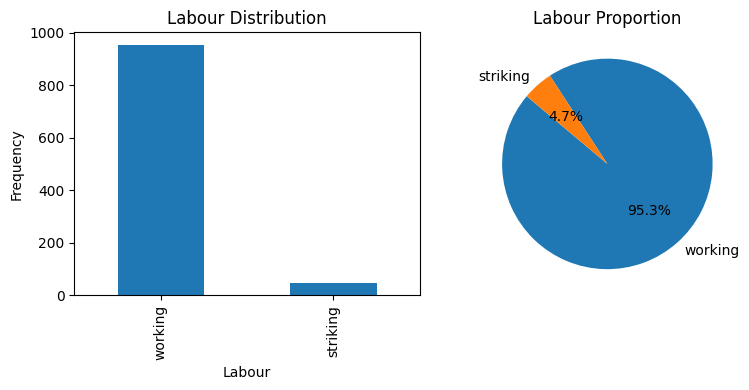

(labour
 working     953
 striking     47
 Name: count, dtype: int64,
 labour
 working     0.953
 striking    0.047
 Name: proportion, dtype: float64)

In [14]:
# Calculate frequency and relative proportion for the 'labour' variable
labour_frequency = ports_replacemissing['labour'].value_counts()
labour_proportion = ports_replacemissing['labour'].value_counts(normalize=True)

# Create visualizations for the 'labour' variable
plt.figure(figsize=(8, 4))

# Bar chart for labour frequency
plt.subplot(1, 2, 1)
labour_frequency.plot(kind='bar')
plt.title("Labour Distribution")
plt.xlabel("Labour")
plt.ylabel("Frequency")

# Pie chart for labour proportion
plt.subplot(1, 2, 2)
labour_proportion.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Labour Proportion")
plt.ylabel(None)  # Removes the 'labour' label on the y-axis

plt.tight_layout()
plt.show()

labour_frequency, labour_proportion

The bar and pie charts illustrate the distribution of labour conditions within the dataset. The bar chart shows that the 'working' condition is overwhelmingly more common than 'striking', with 953 occurrences compared to 47. This significant disparity is highlighted in the pie chart, where 'working' accounts for 95.3% of the data, leaving 'striking' with a minimal slice at 4.7%.

These visualisations effectively convey that normal working conditions predominate in the dataset, suggesting either a period of industrial stability or a selective recording of labour status. The tiny proportion of 'striking' could indicate rare labour disruptions or potentially underreported strike occurrences. Given the high frequency of 'working' conditions, any analysis of labour's impact on port operations would be heavily skewed towards normal operational conditions, possibly limiting insights into the effects of strikes.